# Bookstore Data Analysis

This is my first project combining **web scraping**, **data analysis with pandas**, and **visualization with matplotlib**.

The goal is to explore stock availability across different book categories, understand distribution patterns, and visualize the data using various chart types.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew

df = pd.read_csv("./csv/updated_bookshelf.csv")

# df['Category'] = df['Category'].replace({"Add a comment": "No Category", "Default": "No Category"})
print(df.info())
print(f"\nThere are {df.isna().sum().sum()} cells empty.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        998 non-null    object 
 1   Rating       998 non-null    int64  
 2   Price        998 non-null    float64
 3   Stock        998 non-null    int64  
 4   Category     998 non-null    object 
 5   Description  998 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 46.9+ KB
None

There are 0 cells empty.


There are 8569 out of stock!
The average price of the books is 41.64929859719439€. (Prices have been converted from GBP to EUR)
The maximum price of a book is 71.3€ while the minimum is 11.9€.
The most common price of a book is 26.3€
Skew metric: -0.03693656091844716


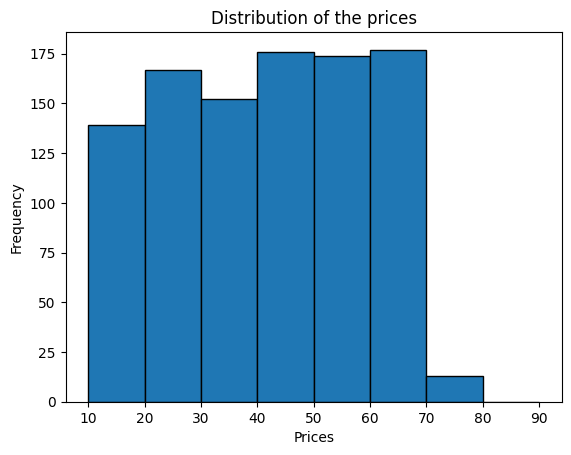

In [10]:
avg_price = df['Price'].mean()
max_price = df['Price'].max()
min_price = df['Price'].min()
most_common_price = df['Price'].mode().iloc[0]

euro = "\N{euro sign}"

print(f"There are {df["Stock"].sum()} out of stock!")
print(f"The average price of the books is {avg_price}{euro}. (Prices have been converted from GBP to EUR)")
print(f"The maximum price of a book is {max_price}{euro} while the minimum is {min_price}{euro}.")
print(f"The most common price of a book is {most_common_price}{euro}")

bins = [10, 20, 30, 40, 50, 60, 70, 80, 90]

df['Price'].plot(kind="hist", bins=bins, title="Distribution of the prices", edgecolor="black", xlabel="Prices")
print(f"Skew metric: {skew(df['Price'])}")

### **Question:** *How are the book prices distributed?*

According to the histogram, the peak frequencies are in the 40–70€ range, with all three of those bins (40–50€, 50–60€, 60–70€) reaching close to 175–180 books each, even though the most common individual price is 26.3€. This indicates that the average of 41.67€ fits nicely with that distribution.

The distribution of book prices is **approximately symmetric, with a very slight left skew (almost neutral)**. This matches the histogram, where most prices are spread fairly evenly between 20–70€ (skew < 0)

Correlation between Price and Rating: 0.03008785267773709


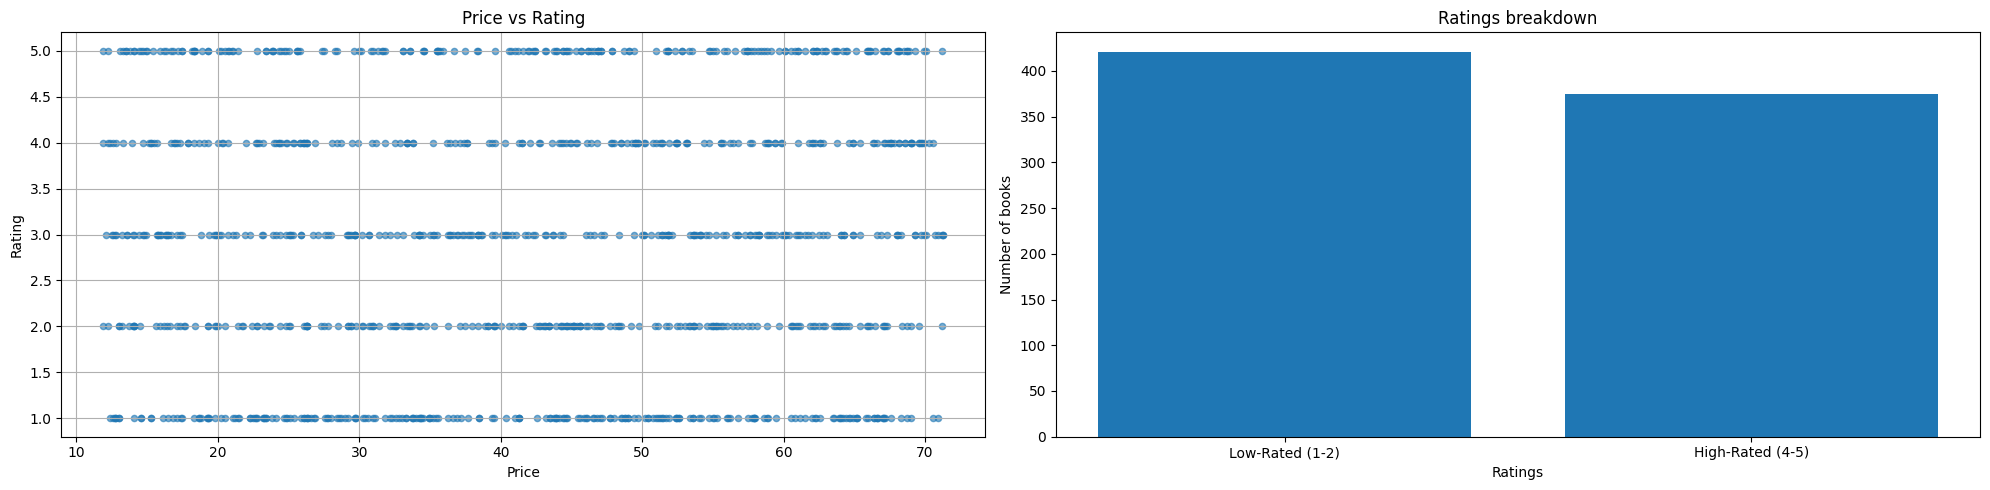

In [4]:
corr = df['Price'].corr(df['Rating'])
print(f"Correlation between Price and Rating: {corr}")

high_rated = df[(df['Rating'] >= 4) & (df['Rating'] <= 5)]
low_rated = df[(df['Rating'] >= 1) & (df['Rating'] <= 2)]

counter = [len(low_rated), len(high_rated)]
labels = ["Low-Rated (1-2)", "High-Rated (4-5)"]

fig, axs = plt.subplots(1, 2, figsize=(20, 5))
df.plot(kind="scatter", x="Price", y="Rating", title="Price vs Rating", alpha=0.6, grid=True, ax=axs[0])
axs[1].bar(labels, counter)
axs[1].set_xlabel("Ratings")
axs[1].set_ylabel("Number of books")
axs[1].set_title("Ratings breakdown")
plt.tight_layout()

### **Question:** *Does rating correlate with price?*

In this dataset, how much a book costs doesn't really tell you anything about how well it's rated. A 70€ book could be rated 1.0, and a 15€ book could be rated 5.0 — there's no consistent trend.

### **Question:** *Are there more high-rated (4-5 stars) or low-rated (1-2 stars) books?*

According to the box plot, there are more low-rated books than high-rated.


In [5]:
most_common_category = df['Category'][df['Category'] != "No Category"].value_counts().idxmax()
print(f"The category with the most books is '{most_common_category}'. (Excluding books with no category)")

print("The average price per the 5 most expensive categories:")
avg_price_per_category = round(df['Price'].groupby(df['Category']).mean().sort_values(ascending=False).reset_index(),1)
avg_price_per_category.columns = ["Category", "Average Price"]
print(avg_price_per_category.head())

print("\nThe average rating of the 5 most high-rated categories:")
avg_rating_per_category = round(df['Rating'].groupby(df['Category']).mean().sort_values(ascending=False).reset_index(),1)
avg_price_per_category.columns = ["Category", "Average Rating"]
print(avg_rating_per_category.head())

The category with the most books is 'Nonfiction'. (Excluding books with no category)
The average price per the 5 most expensive categories:
    Category  Average Price
0   Suspense           69.3
1     Novels           65.1
2   Politics           63.7
3     Health           61.1
4  New Adult           55.1

The average rating of the 5 most high-rated categories:
            Category  Rating
0      Adult Fiction     5.0
1            Erotica     5.0
2             Novels     5.0
3  Christian Fiction     4.2
4             Health     3.8


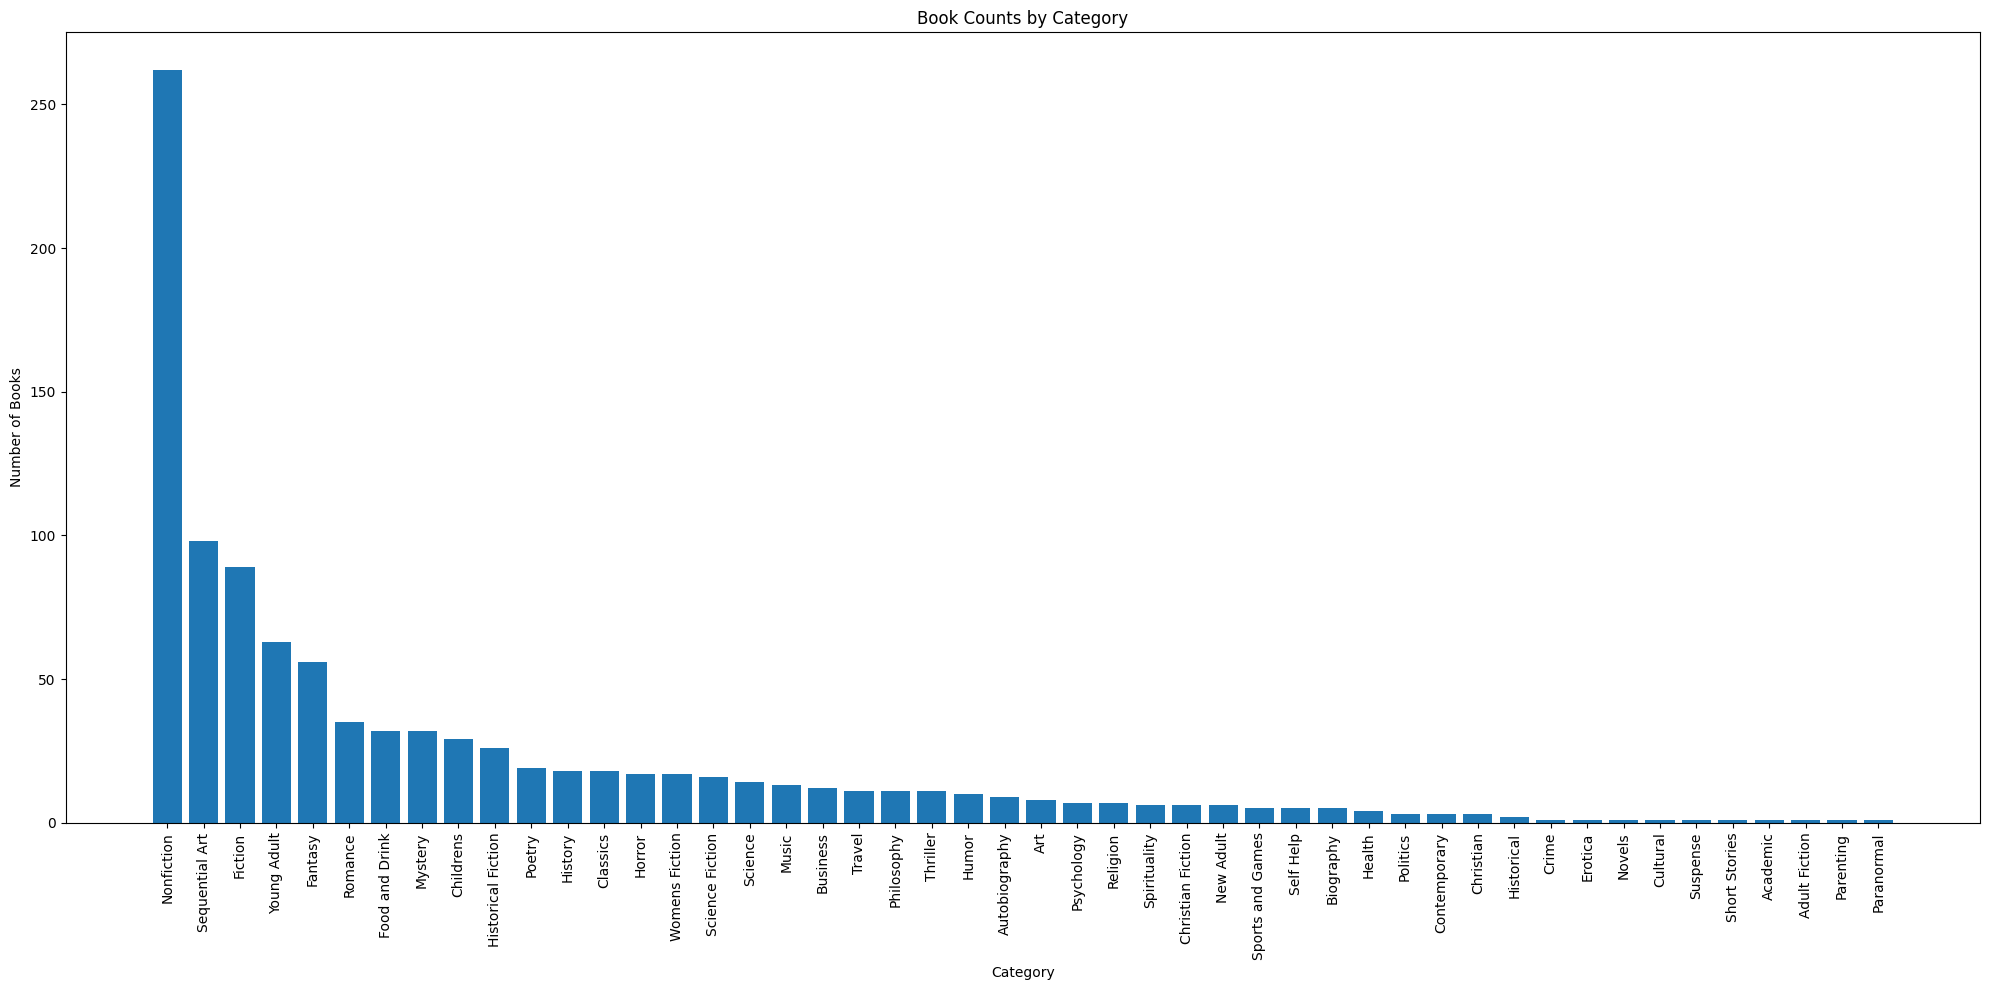

In [6]:
plt.figure(figsize=(20, 10))
plt.bar(df['Category'].value_counts().index, df['Category'].value_counts().values)
plt.xticks(rotation=90)
plt.tight_layout()
plt.xlabel('Category')
plt.ylabel('Number of Books')
plt.title('Book Counts by Category')
plt.tight_layout()

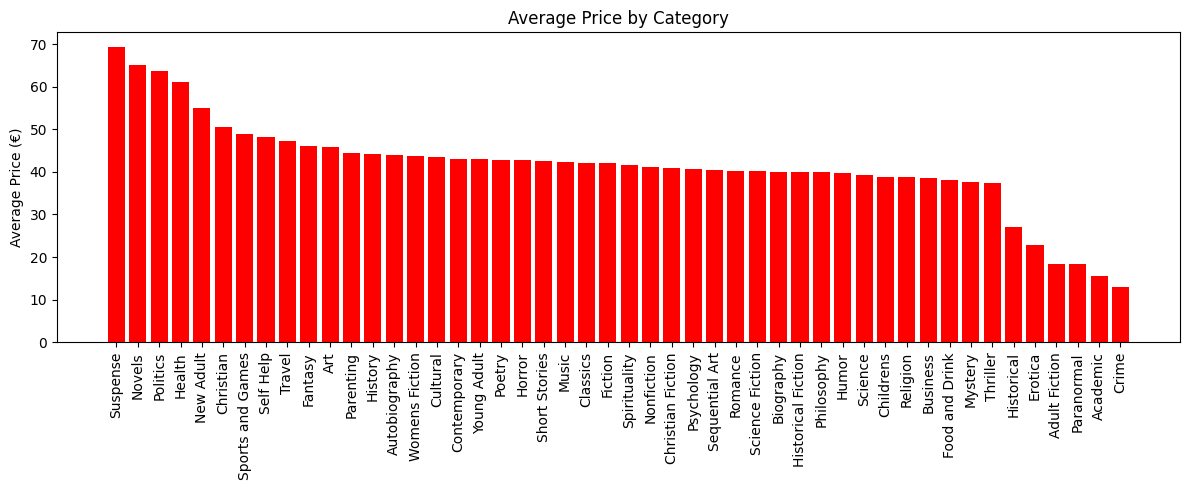

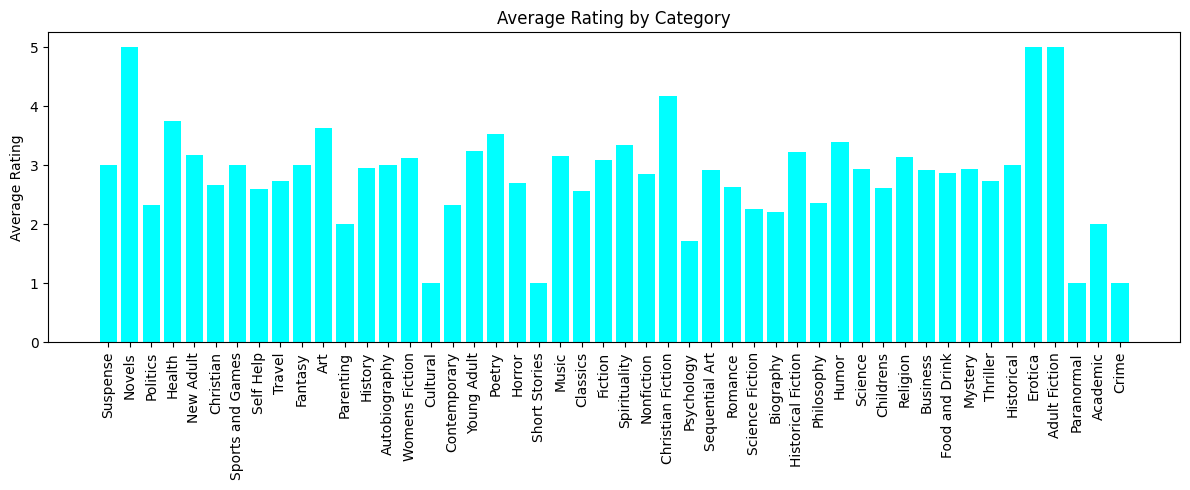

In [7]:
grouped = df[df['Category'] != 'No Category'].groupby('Category')[['Price', 'Rating']].mean().sort_values('Price', ascending=False)

plt.figure(figsize=(12, 5))
plt.bar(grouped.index, grouped['Price'], color="red")
plt.xticks(rotation=90)
plt.title("Average Price by Category")
plt.ylabel(f"Average Price ({euro})")
plt.tight_layout()

plt.figure(figsize=(12, 5))
plt.bar(grouped.index, grouped['Rating'], color="cyan")
plt.xticks(rotation=90)
plt.title("Average Rating by Category")
plt.ylabel("Average Rating")
plt.tight_layout()

There are 0 books out of stock.


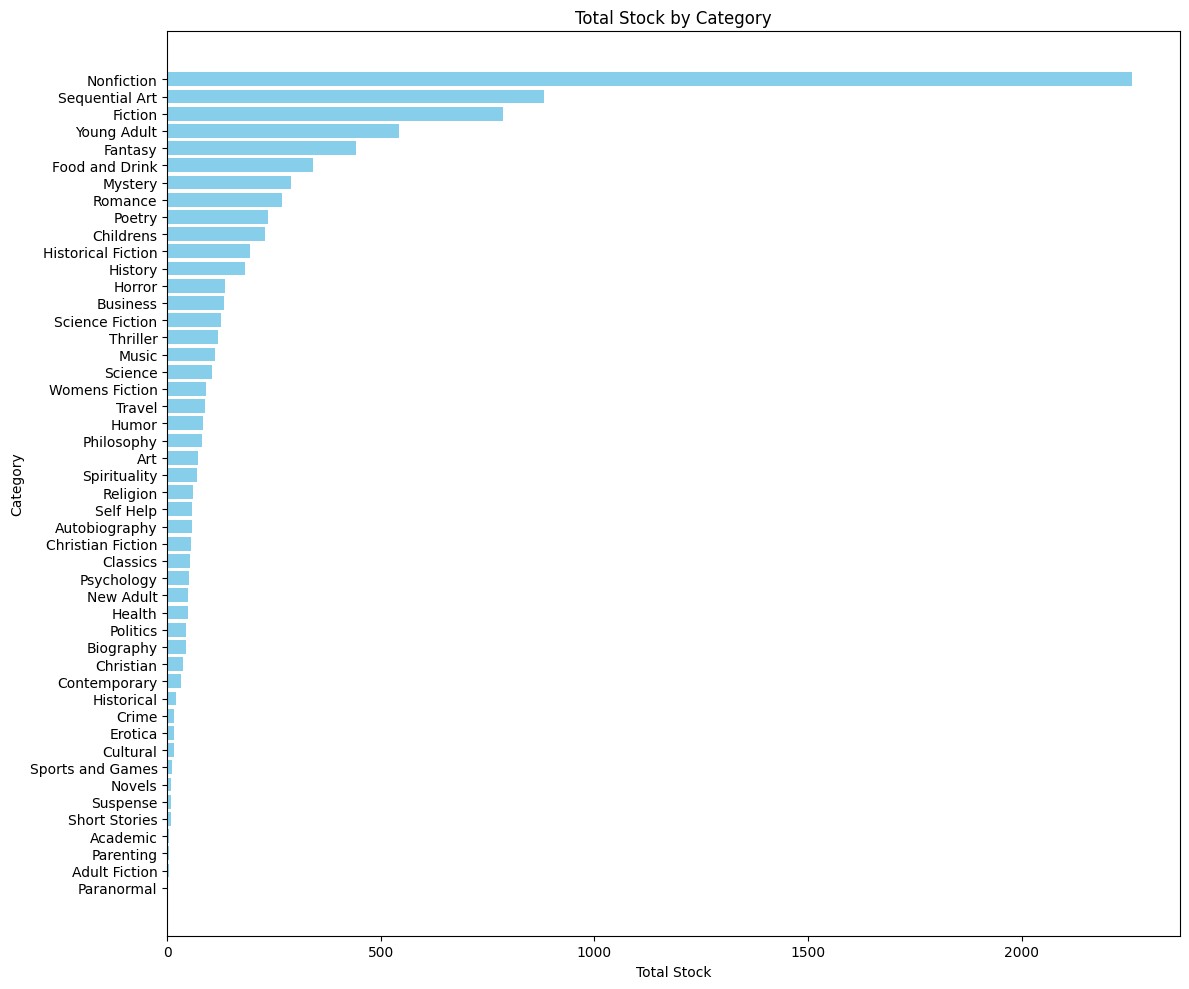

In [8]:
print(f"There are {(df['Stock'] == 0).sum()} books out of stock.")

grouped = df['Stock'].groupby(df['Category']).sum().sort_values()

plt.figure(figsize=(12, 10))
plt.barh(grouped.index, grouped.values, color="skyblue")

plt.title("Total Stock by Category")
plt.xlabel("Total Stock")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

Finally, this horizontal bar chart presents the **total available stock** for each book category. Low or zero stock in the suspense category may indicate high demand and frequent purchases, as evidenced by the **Novels**, **Erotica** & **Adult Fiction** categories having both the lowest stock and the best average rating.